# Проект 5 

# Анализ рекламных источников игры "Космические братья"

## Задача
Проранжировать источники привлечения по различным критериям, таким как:
- стоимость привлечения
- вовлеченность игроков
- особенности прохождения игры
- скорость прохождения

### 1. предобработка данных
- Исследовать пропущенные значения;
- Исследовать соответствие типов;
- Исследовать дубликаты;
- Проверить корректность наименований колонок.

### 2. исследовательский анализ данных
- исследовать сколько пользователей пришли по источнику
- посчитать САС на источник
- исследовать долю прошедших на второй этап от кол-ва привлеченных по источникам
- исследовать способ прохождения на второй уровень в разбивке по источникам
- какие пользователи дольше играют, опять же в разбивке по источникам
- сколько зданий строят пользователи в разбивке по источникам(вероятная монетизация)

### 3. проверить различется ли время завершения уровня в зависимости способа прохождения:
- через реализацию проекта,
- через победу над первым игроком.

### 4. проверить различается ли количество построенных зданий в зависимости от игровой стратегии пользователя PvP или PvE у игроков прошедших на второй уровень.

### 5. ранжирование источников на основании выявленных фактов и закономерностей

# РЕШЕНИЕ

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Предобработка данных

Посмотрим на данные - прочитаем и предобработаем датасеты

In [3]:
try:
    actions = pd.read_csv('/Users/sergejnitkin/Final_project/game_actions.csv', parse_dates=['event_datetime'])
except:
    actions = pd.read_csv('/datasets/game_actions.csv', parse_dates=['event_datetime'])
actions = actions.rename(columns={'event_datetime' : 'event_dt'})
actions.sample(15, random_state=0)

,event_dt,event,building_type,user_id,project_type
126283,2020-05-18 19:01:56,building,spaceport,8baf4ab0-f490-4642-b68f-5f4a2826c458,NaN
5087,2020-05-04 15:12:32,building,assembly_shop,fb7febbc-8cbb-4c11-8cee-5f56226177c4,NaN
43899,2020-05-08 11:48:13,building,spaceport,369e2d01-7249-486c-b8f5-de67045df492,NaN
56075,2020-05-09 11:25:18,building,spaceport,f44f5682-781d-465e-aba0-a8431d1d2380,NaN
45270,2020-05-08 14:36:36,building,assembly_shop,4468b134-087c-4fda-9ef0-347c20db0b18,NaN
129316,2020-05-20 02:05:44,building,research_center,e1f95466-ce2e-4bc9-bcac-f5fec413f50c,NaN
56226,2020-05-09 11:44:27,building,assembly_shop,e4870307-4dbc-495b-9772-486595479b68,NaN
133021,2020-05-22 16:15:24,building,spaceport,e10eae9e-bc5c-4b01-bc62-0ac8fe5cf8a1,NaN
120505,2020-05-17 02:29:10,project,NaN,5c0ded2e-62f2-4812-9ca2-5e31fcff045f,satellite_orbital_assembly
92339,2020-05-12 17:26:14,building,research_center,cc6dd7e9-3d9e-4739-bdc0-6c6ed4851504,NaN


In [4]:
actions.info() # посмотрим на структуру и типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_dt       135640 non-null  datetime64[ns]
 1   event          135640 non-null  object        
 2   building_type  127957 non-null  object        
 3   user_id        135640 non-null  object        
 4   project_type   1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


с названиями колонок и типами данных все в порядке

In [5]:
actions.duplicated().sum() # поищем явные дубликаты

1

In [6]:
actions[actions.duplicated()]

,event_dt,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [7]:
actions = actions.drop_duplicates() # избавимся от дубликатов
actions.duplicated().sum()

0

Поищем неявные дубликаты

In [8]:
actions['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

In [9]:
print(actions['event'].unique())
print(actions['building_type'].unique())
print(actions['project_type'].unique())

['building' 'finished_stage_1' 'project']
['assembly_shop' 'spaceport' nan 'research_center']
[nan 'satellite_orbital_assembly']


тут нет неявных дубликатов.

#### Посмотрим на природу пропусков и их логику.

In [10]:
actions[actions['building_type'].isna()].sample(10, random_state=0) 

,event_dt,event,building_type,user_id,project_type
118938,2020-05-16 18:23:24,finished_stage_1,NaN,de7f8d45-4c2d-499a-beef-db083c5f6a3d,NaN
120869,2020-05-17 04:23:29,project,NaN,2eb93be4-3193-4cd8-90b7-806abed84ee8,satellite_orbital_assembly
121394,2020-05-17 07:07:28,finished_stage_1,NaN,3ed7037a-0b28-4b59-80e9-df4d69cac15a,NaN
84775,2020-05-11 18:41:47,finished_stage_1,NaN,45a7a941-bee7-40bc-93bb-88206cfc3cd0,NaN
101755,2020-05-13 22:52:18,project,NaN,f31a74d2-2877-4256-a57c-c3af85f862bc,satellite_orbital_assembly
87405,2020-05-12 02:25:59,finished_stage_1,NaN,1233ad33-a36d-4440-8002-7ae4a8f52715,NaN
129469,2020-05-20 03:54:08,finished_stage_1,NaN,f54adf83-0984-4809-8426-34c4a7d80abc,NaN
131651,2020-05-21 11:02:37,finished_stage_1,NaN,4bebc4dc-b26e-428b-ab53-e58090e21909,NaN
121156,2020-05-17 05:54:45,finished_stage_1,NaN,c2c260e7-f203-4c5a-ad32-e47c2d158476,NaN
95150,2020-05-13 02:02:26,finished_stage_1,NaN,96c82533-8fef-4e37-9f68-cf5f81fbb247,NaN


Если event не равен building, то в building_type будет пропуск, тк это детализация, какого типа было построено здание

In [11]:
actions[actions['project_type'].isna()].sample(15, random_state=2)

,event_dt,event,building_type,user_id,project_type
74844,2020-05-10 18:38:23,building,spaceport,8f244188-77f0-4410-96f0-f0416d5e2802,NaN
47381,2020-05-08 18:45:01,building,spaceport,5b47d757-e2c4-463c-bd40-643ad1f02f72,NaN
9961,2020-05-05 04:59:04,building,assembly_shop,f5df0be9-bee9-42f8-866b-db54b79f2c7f,NaN
18353,2020-05-06 02:44:37,building,assembly_shop,bc73ebc8-156f-49d6-92c9-3735fd1b59a5,NaN
109981,2020-05-15 03:53:33,building,research_center,d5c6b8e6-1113-428a-9127-d0c1386bb0ac,NaN
72913,2020-05-10 15:43:34,building,spaceport,1bb09b65-b76b-429f-aa91-1cf33cbc225c,NaN
97060,2020-05-13 07:59:42,building,spaceport,1d2bf6d4-1810-4400-bc11-8753f33b4df6,NaN
97667,2020-05-13 09:53:57,building,spaceport,29131ef3-7318-404f-8a32-9e20bbcf905f,NaN
133740,2020-05-23 14:42:24,building,spaceport,0afc6da0-92aa-4806-aa2e-88e3f4df3fa0,NaN
91208,2020-05-12 13:51:16,finished_stage_1,NaN,eac6c4ae-7221-4b39-9848-381e21cbc274,NaN


In [12]:
actions.query('event == "project"').project_type.isna().sum()

0

тут тоже все логично: НАН всегда, кроме случаев, когда ивент = проджект. (проджект - это условие перехода на новый уровень, то есть стратегия PvE), и project_type это детализация проджекта (что именно было построено)

#### Посмотрим теперь на другой датасет

In [13]:
try:
    users = pd.read_csv('/Users/sergejnitkin/Final_project/user_source.csv')
except:
    users = pd.read_csv('/datasets/user_source.csv')
users

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [15]:
users.duplicated().sum() # чекнем на явные дубликаты

0

In [16]:
users['source'].unique() # чекнем неявные дубликаты

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

тут все хорошо

In [17]:
users.isna().sum() # проверка на пропуски

user_id    0
source     0
dtype: int64

Тут все в порядке тоже. Теперь следующий датасет.

In [18]:
try:
    ads = pd.read_csv('/Users/sergejnitkin/Final_project/ad_costs.csv', parse_dates=['day'])
except:
    ads = pd.read_csv('/datasets/ad_costs.csv', parse_dates=['day'])
ads = ads.rename(columns={'day' : 'date'})
ads['cost'] = ads['cost'].round(2) # округлим до 2 цифр после запятой
ads

,source,date,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77
5,facebook_ads,2020-05-08,68.01
6,facebook_ads,2020-05-09,38.72
7,instagram_new_adverts,2020-05-03,943.20
8,instagram_new_adverts,2020-05-04,502.93
9,instagram_new_adverts,2020-05-05,313.97


In [19]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   date    28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Тут небольшой датасет и глазами видно, что все ок.

# Исследовательский анализ

- ### исследовать сколько пользователей пришли по источнику

In [20]:
users.groupby('source').agg({'user_id': 'count'}).sort_values(by='user_id')

,user_id
source,
youtube_channel_reklama,2686
facebook_ads,2726
instagram_new_adverts,3347
yandex_direct,4817


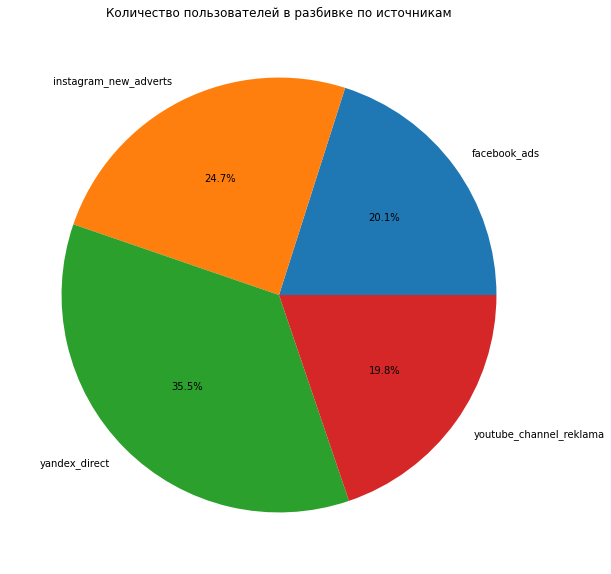

In [21]:
(
    users.groupby('source').agg({'user_id': 'count'})
 .plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(10, 10), legend=False)
)
plt.title('Количество пользователей в разбивке по источникам')
plt.ylabel('')
plt.show()

Больше всего пользователей пришло по яндекс директ - 4817 или 35,5%, затем инстаграм (24,7%), потом с почти одинаковым количеством идут фэйсбук и ютуб - около 20% каждый. Таким образом Яндекс директ обеспечил почти треть всего трафика.

*некоторые запрещены в России)

- ### Теперь посмотрим на среднюю стоимость привлечения одного пользователя (САС).

In [22]:
user_cost = (
    ads.groupby('source').agg({'cost': 'sum'})
    .merge(users.groupby('source', as_index=False).agg({'user_id': 'count'}), on='source')
            )
user_cost

,source,cost,user_id
0,facebook_ads,2140.90,2726
1,instagram_new_adverts,2161.45,3347
2,yandex_direct,2233.11,4817
3,youtube_channel_reklama,1068.11,2686


In [23]:
user_cost['cost_by_user'] = user_cost['cost'] / user_cost['user_id']
user_cost = user_cost.set_index('source')
user_cost

,cost,user_id,cost_by_user
source,,,
facebook_ads,2140.90,2726,0.785363
instagram_new_adverts,2161.45,3347,0.645787
yandex_direct,2233.11,4817,0.463589
youtube_channel_reklama,1068.11,2686,0.397658


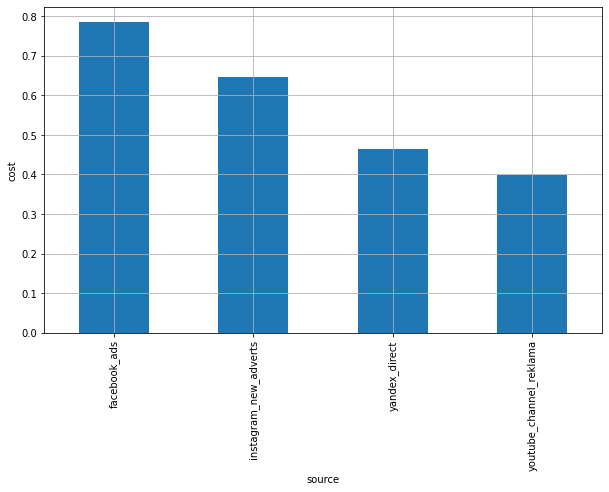

In [24]:
user_cost['cost_by_user'].plot(kind='bar', grid=True, figsize =(10, 6), ylabel='cost')
plt.show()

Тут мы видим, что самый дешевый пользователь ютуба, затем идет яндекс, затем инстаграм и потом уже фэйсбук. Стоит заметить, что стоимость привлечения через фэйсбук около 2х раз выше, чем у ютуба. Тут возможно стоит обратить внимание на ютуб, тк там самый низкий САС, а через этот канал привлекается всего 19,8% игроков, но окончательно об этом можно будет говорить только после анализа поведения игроков.

## Далее посмотрим на пользователей и то, как они взаимодействуют с игрой.

для полноты картины добавим 2 столбца
1. день события
2. источник, по которому пришел пользователь

In [25]:
actions['event_date'] = pd.to_datetime(actions['event_dt']).dt.date
actions = actions.merge(users, on='user_id', how='left')
actions

,event_dt,event,building_type,user_id,project_type,event_date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,yandex_direct
...,...,...,...,...,...,...,...
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,instagram_new_adverts
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,yandex_direct
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-06-05,youtube_channel_reklama
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,facebook_ads


- ####  исследовать долю прошедших на второй этап от кол-ва привлеченных по источникам

In [26]:
actions.groupby('event').agg({'user_id': 'nunique'})

,user_id
event,
building,13576
finished_stage_1,5817
project,1866


In [27]:
actions['user_id'].nunique()

13576

Если взять в расчет, что постройка одного здания - это участие, то finished_stage_1 - это переход игрока на следующий уровень, а project - это победа игрока по стратегии PvE. Тогда получается, что из 13576 участников на второй уровень проходят 5817 участников, что составляет около 42,8%. Из них на следующий этап проходят путем победы над игроком 3951 игрок (68%), и оставшиеся 1866 (32%) игроков проходят путем выполнения проекта.

#### Далее посмотрим на распределение источников среди победителей.

In [28]:
winners = actions.pivot_table(index='source', columns='event', values='user_id', aggfunc='nunique').reset_index()
winners = winners.sort_values(by='building', ascending=False)
winners['pvp_winners'] = winners['finished_stage_1'] - winners['project']
winners = winners.rename(columns={'building': 'players', 'project': 'pve_winners'})
winners

event,source,players,finished_stage_1,pve_winners,pvp_winners
2,yandex_direct,4817,2042,620,1422
1,instagram_new_adverts,3347,1466,476,990
0,facebook_ads,2726,1150,391,759
3,youtube_channel_reklama,2686,1159,379,780


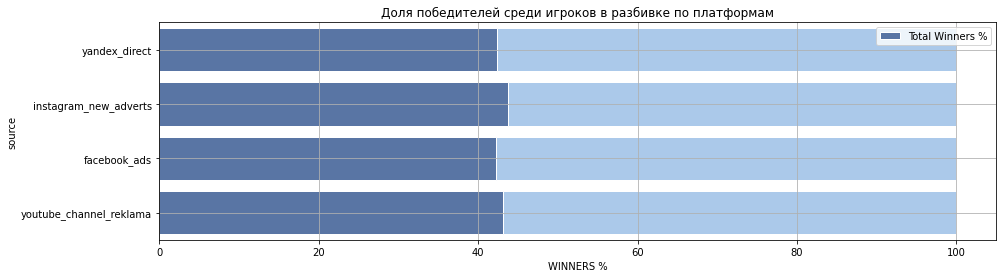

In [29]:
f, ax = plt.subplots(figsize = (15,4))

sns.set_color_codes('pastel')
sns.barplot(x = (winners['players'] / winners['players'] * 100).round(2)
            , y = 'source', data = winners, color = 'b', edgecolor = 'w')

sns.set_color_codes('deep')
sns.barplot(x = (winners['finished_stage_1'] / winners['players'] * 100).round(2), y = 'source', data = winners,
            label = 'Total Winners %', color = 'b', edgecolor = 'w')
plt.xlabel("WINNERS %")
plt.title('Доля победителей среди игроков в разбивке по платформам')
plt.grid(True)
ax.legend()
plt.show()

Если смотреть в разрезе по источникам, то тут картина примерно одинаковая, хуже всех проходят игру пользователи из фейсбука, лучше всех из инстаграма.

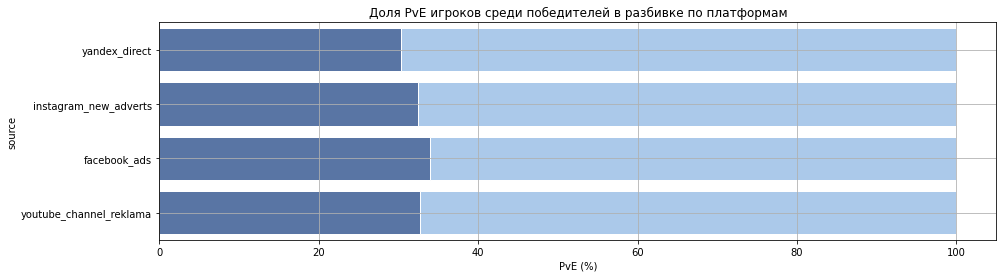

In [30]:
f, ax = plt.subplots(figsize = (15,4))

sns.set_color_codes('pastel')
sns.barplot(x = (winners['finished_stage_1'] / winners['finished_stage_1'] * 100).round(2)
            , y = 'source', data = winners, label = 'PvP %', color = 'b', edgecolor = 'w')

sns.set_color_codes('deep')
sns.barplot(x = (winners['pve_winners'] / winners['finished_stage_1'] * 100).round(2), 
            y = 'source', data = winners,
            label = 'PvE (%)', color = 'b', edgecolor = 'w')
plt.xlabel("PvE (%)")
plt.title('Доля PvE игроков среди победителей в разбивке по платформам')
plt.grid(True)

plt.show()

Итак, получается стратегии победителей в разбивке по источникам (PvE/ PvP) %:
- яндекс 30/ 70
- инстаграм 32,5/ 67,5
- фэйсбук 34/ 66
- ютуб 32,7/ 67,3

пользователи инстаграма и ютуба распределились примерно одинаково, больше всего же PvE победителей пришли из фэйсбука.

- ### проанализировать сколько времени игроки проводят в игре

Соберем под это дело датафрейм с минимальной и максимальной датой события по игроку и таймдельтой

In [31]:
time = actions.groupby('user_id').agg({'event_dt': 'min'})
max_t = actions.groupby('user_id').agg({'event_dt': 'max'})
time = time.merge(max_t, on='user_id').reset_index()
time = time.rename(columns={'event_dt_x': 'min', 'event_dt_y': 'max'})
time['timedelta_days'] = time['max'] - time['min']
time

,user_id,min,max,timedelta_days
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14 days 10:18:29
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,12 days 07:37:40
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,8 days 15:12:35
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,16 days 12:56:47
...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,7 days 20:16:55
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,2020-05-14 10:11:36,9 days 22:13:22
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,8 days 10:56:43
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,2020-05-11 22:04:30,7 days 01:36:02


In [32]:
time['timedelta_days'] = time['timedelta_days'].dt.days # для визуализации на нужны числовые данные, поэтому преобразуем
time                                                    # таймдельту в дни

,user_id,min,max,timedelta_days
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,8
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,16
...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,7
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,2020-05-14 10:11:36,9
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,8
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,2020-05-11 22:04:30,7


In [33]:
time['timedelta_days'].describe()

count    13576.000000
mean        10.175309
std          4.356852
min          0.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         30.000000
Name: timedelta_days, dtype: float64

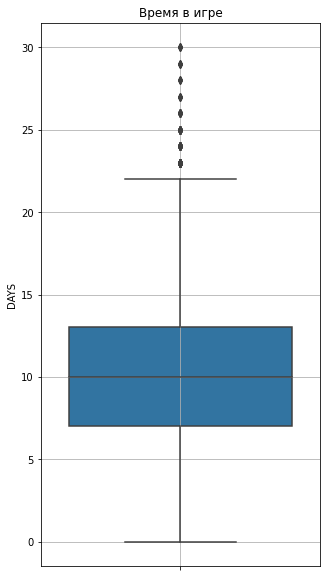

In [34]:
plt.figure(figsize=(5,10))
sns.boxplot(y = time['timedelta_days'])
plt.title('Время в игре')
plt.ylabel("DAYS")
plt.grid(True)
plt.show()

Видим, что в среднем игроки проводят около 10 дней в игре, но разные игроки проводят его по-разному, есть те кто сразу вышел из игры, есть те, кто перешел на второй уровень, есть игроки, кто предпочитает PvP, а есть - PvE.

#### Далее посмотрим на время в игре в разбивке по стратегиям и источникам.
для этого создадим списки с pvp победителями, pve победителями и теми кто по той или иной причине не прошел во второй тур

In [35]:
win_users = actions.query('event == "finished_stage_1"').user_id.unique()
pve_winners = actions.query('event == "project"').user_id.unique()
pvp_winners = actions.query('(user_id in @win_users) & (user_id not in @pve_winners)').user_id.unique()
lost_users = actions.query('user_id not in @win_users').user_id.unique()
print('PvE: {}'.format(len(pvp_winners)))
print('PvP: {}'.format(len(pve_winners)))
print('Winners: {}'.format(len(win_users)))
print('Losers: {}'.format(len(lost_users)))

PvE: 3951
PvP: 1866
Winners: 5817
Losers: 7759


Далее посмотрим на данные по времени прохождения первого этапа в разбивке по источникам, для этого прикрутим столбец с источником к нашему датафрейму

In [36]:
time = time.merge(users, on='user_id').reset_index()
time

,index,user_id,min,max,timedelta_days,source
0,0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14,facebook_ads
1,1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,12,yandex_direct
2,2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,8,youtube_channel_reklama
3,3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6,instagram_new_adverts
4,4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,16,facebook_ads
...,...,...,...,...,...,...
13571,13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,7,instagram_new_adverts
13572,13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,2020-05-14 10:11:36,9,facebook_ads
13573,13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,8,yandex_direct
13574,13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,2020-05-11 22:04:30,7,instagram_new_adverts


#### посмотрим на время в игре в разбивке по источникам

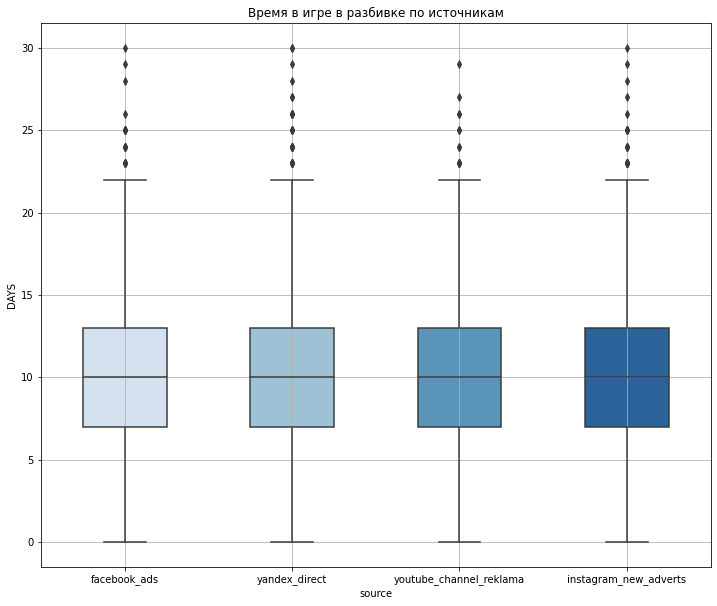

In [37]:
plt.figure(figsize=(12, 10))
sns.boxplot( x=time["source"], y=time["timedelta_days"], palette="Blues", width=0.5);
plt.title('Время в игре в разбивке по источникам')
plt.ylabel("DAYS")
plt.grid(True)
plt.show()

Здесь можем наблюдать, что игроки из всех источников проводят примерно одинаковое время в игре, отличаются, разве что, выбросы - у игроков с ютуба их кол-во чуть меньше

#### теперь же посмотрим на время прохождения первого этапа в разбивке по источникам и победителям и проигравшим.

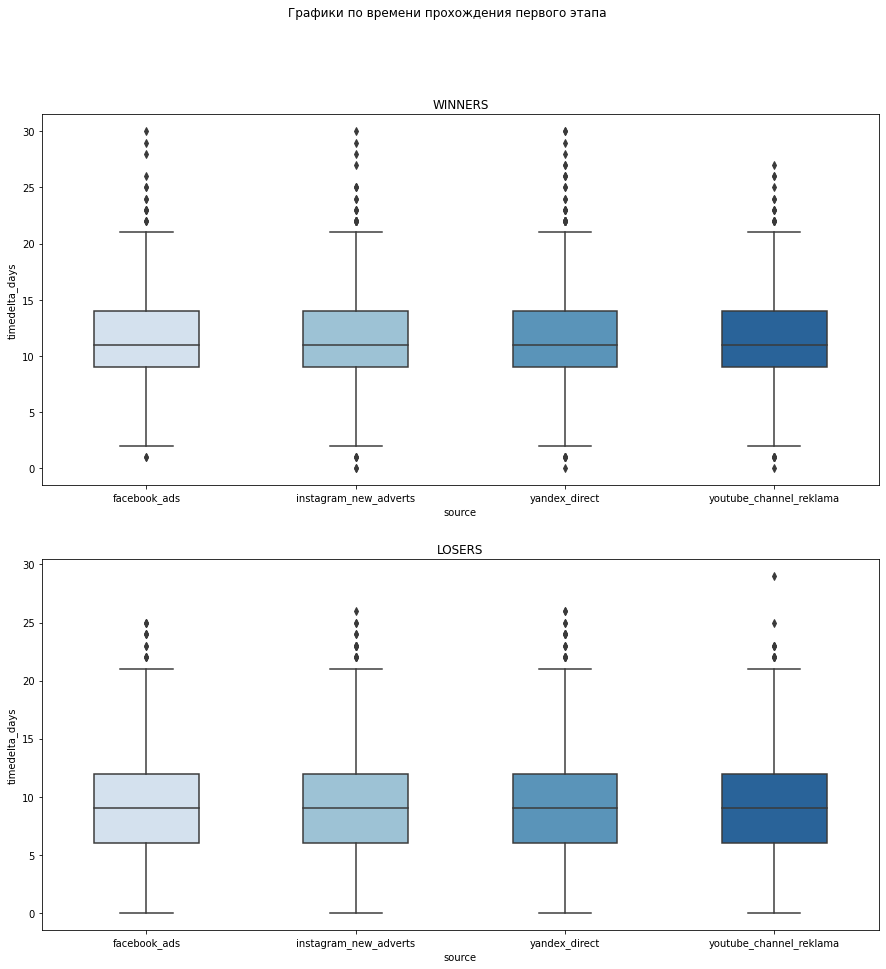

In [38]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 15))
fig.suptitle('Графики по времени прохождения первого этапа')

sns.boxplot(ax=axes[0], data=time.query('user_id in @win_users').sort_values(by='source')
            , x='source', y='timedelta_days', palette="Blues", width=0.5).set_title("WINNERS")

sns.boxplot(ax=axes[1], data=time.query('user_id in @lost_users').sort_values(by='source')
            , x='source', y='timedelta_days', palette="Blues", width=0.5).set_title("LOSERS")
plt.show()

Что ксается победителей и проигравших, то тут, как и следовало ожидать, можно увидеть тенденцию, что победители проводят больше времени в игре, их медиана -11 дней, против 9 у проигравших. Причем в разбивке по источникам и у тех и у других картина одинаковая, разве, что незначительная разница в выбросах.

#### теперь посмотрим на время прохождения первого этапа в зависимости от выбранной стратегии

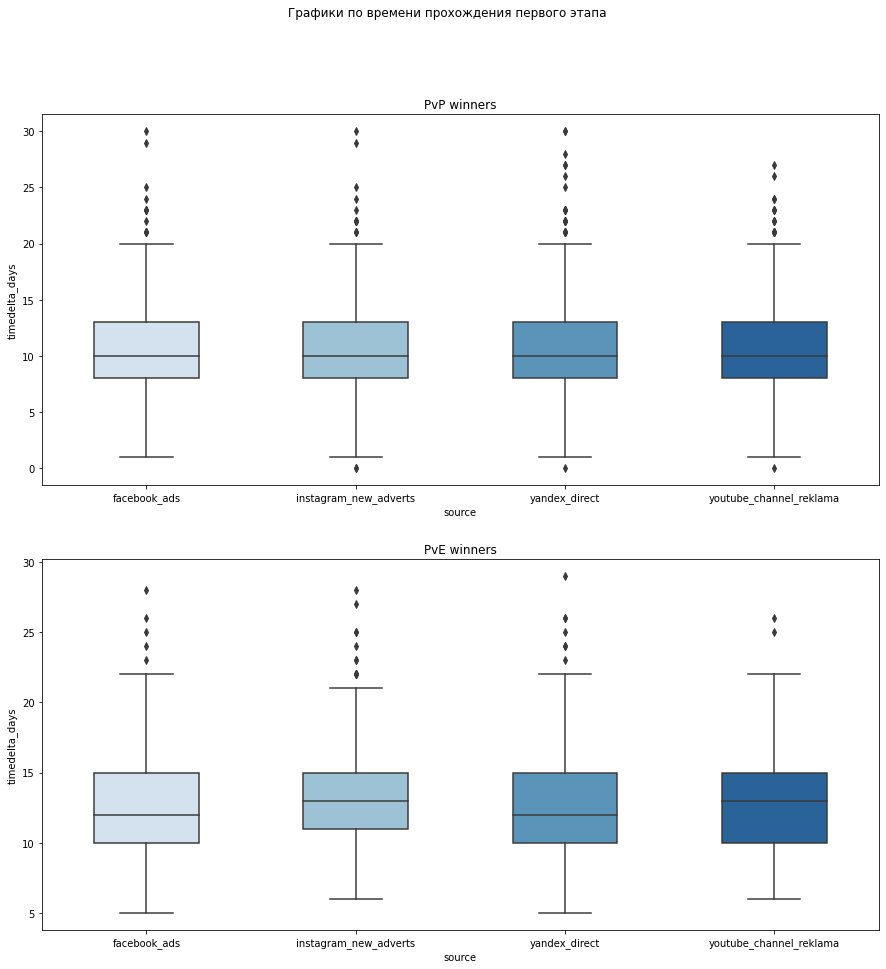

In [39]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 15))
fig.suptitle('Графики по времени прохождения первого этапа')
sns.boxplot(ax=axes[0], data=time.query('user_id in @pvp_winners').sort_values(by='source')
            , x='source', y='timedelta_days', palette="Blues", width=0.5).set_title("PvP winners")
sns.boxplot(ax=axes[1], data=time.query('user_id in @pve_winners').sort_values(by='source')
            , x='source', y='timedelta_days', palette="Blues", width=0.5).set_title("PvE winners")
plt.show()

Судя по графикам можно сделать вывод, что те, кто проходят через победу над игроком, затрачивают на прохождение значительно меньше времени (медиана - 10 дней), причем это так для игроков из всех источников. что касается PvE игроков, то они затрачивают на прохождение 12-13 дней (медианные значения), а 3 квартиль - 15 дней. 

- ### теперь посмотрим на кол-во зданий, которые строят пользователи. это довольно важный показатель в разрезе будущей монетизации.

Для этого пособерем табличку, опираясь на списки игроков, сделанные ранее

In [40]:
n_buildings = actions.query('event == "building"').groupby('user_id').agg({'event': 'count'}).reset_index()
n_buildings = n_buildings.merge(users, on='user_id').reset_index()
n_buildings # здесь мы взяли только события building - тк именно тут планируется будущая монетизация

,index,user_id,event,source
0,0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,facebook_ads
1,1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,yandex_direct
2,2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,youtube_channel_reklama
3,3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,instagram_new_adverts
4,4,002f508f-67b6-479f-814b-b05f00d4e995,12,facebook_ads
...,...,...,...,...
13571,13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9,instagram_new_adverts
13572,13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,facebook_ads
13573,13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9,yandex_direct
13574,13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,instagram_new_adverts


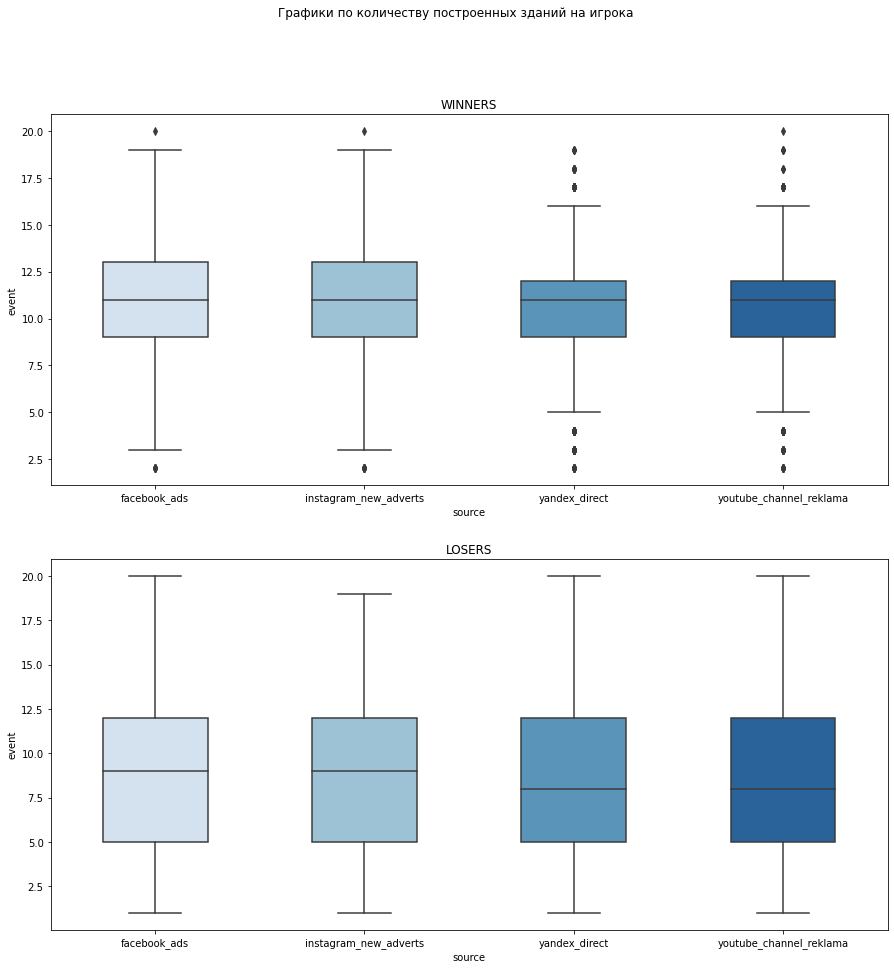

In [41]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 15))
fig.suptitle('Графики по количеству построенных зданий на игрока')
sns.boxplot(ax=axes[0], data=n_buildings.query('user_id in @win_users').sort_values(by='source')
            , x='source', y='event', palette="Blues", width=0.5).set_title("WINNERS")
sns.boxplot(ax=axes[1], data=n_buildings.query('user_id in @lost_users').sort_values(by='source')
            , x='source', y='event', palette="Blues", width=0.5).set_title("LOSERS")
plt.show()

Как и следовало ожидать, прошедшие на следующий этап строят больше зданий. У игроков, не прошедших на второй этап 25 перцентиль равен 5 вне зависимости от источника перехода, 75 перцентиль - 12, тоже вне зависимости от источника, а вот медианы немного отличаются, у игроков с фейсбука и инстаграма медианы около 9, а у яндекс директа и ютуба - 8. Что касается победителей первого этапа, то там распределение ниже, но тоже можно заметить некие закономерности. Игроки с фейсбука и инстаграма строя больше зданий, чем игроки из яндекс и ютуб.

#### Теперь же взглянем на цифры победителей, в зависимости от выбранной стратегии

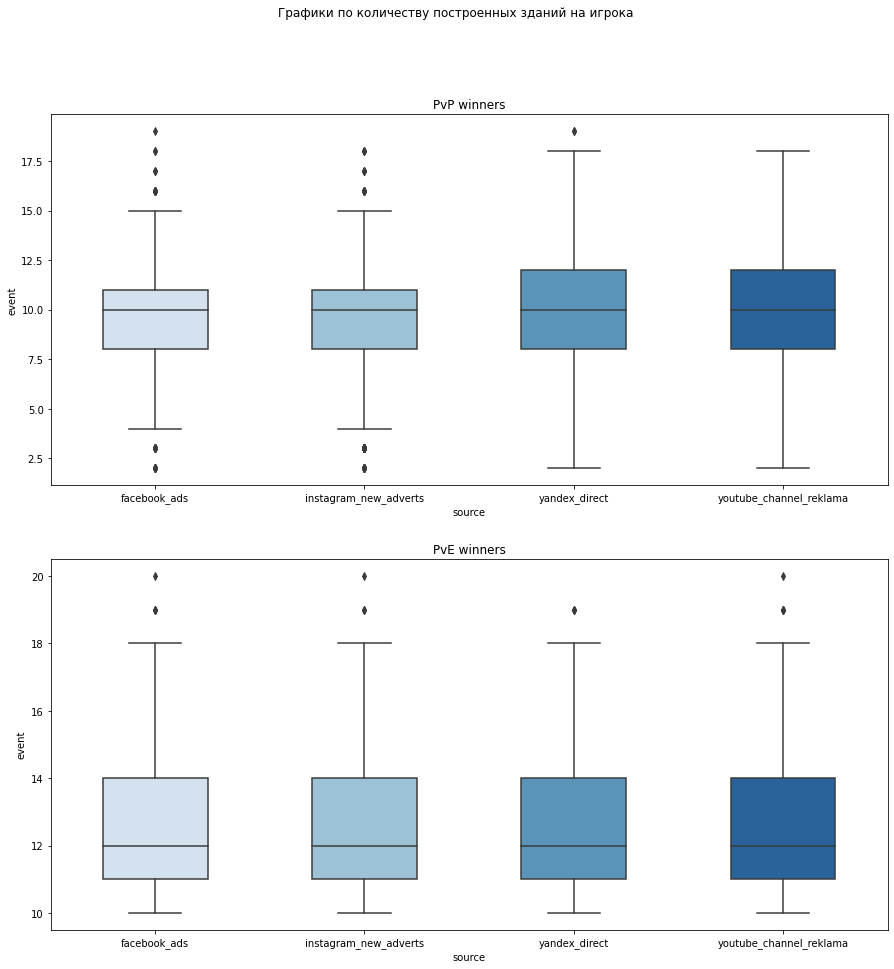

In [42]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 15))
fig.suptitle('Графики по количеству построенных зданий на игрока')
sns.boxplot(ax=axes[0], data=n_buildings.query('user_id in @pvp_winners').sort_values(by='source')
            , x='source', y='event', palette="Blues", width=0.5).set_title("PvP winners")
sns.boxplot(ax=axes[1], data=n_buildings.query('user_id in @pve_winners').sort_values(by='source')
            , x='source', y='event', palette="Blues", width=0.5).set_title("PvE winners")
plt.show()

Здесь тоже можно выявить закономерности, а именно что PvE игроки строят больше зданий (медиана - 12, 1й кванитль - 11, 3й квантиль - 14) и эта картина идентична для всех источников. У игроков PvP же медианное значение - 10. При этом в разбивке по источникам, также можно заметить, что игроки с фэйсбука и инстаграма строят меньше.

## Проверка статистических гипотез.
### различется ли время завершения уровня в зависимости способа прохождения
- через реализацию проекта
- через победу над первым игроком

#### Нулевая гипотеза: среднее время завершения первого этапа через постройку базы и среднее время завершения первого этапа через победу над другим игроком одинаковое
#### Альтернативная гипотеза: среднее время завершения первого этапа через постройку базы и среднее время завершения первого этапа через победу над другим игроком разное

In [43]:
print('Среднее время прохождения первого этапа через победу над игроком: {}'
      .format(time.query('user_id in @pvp_winners').timedelta_days.mean()))

Среднее время прохождения первого этапа через победу над игроком: 10.606175651733738


In [44]:
print('Среднее время прохождения первого этапа через постройку спутников: {}'
      .format(time.query('user_id in @pve_winners').timedelta_days.mean()))

Среднее время прохождения первого этапа через постройку спутников: 12.963022508038586


In [45]:
alpha = .05
pvp_pve_means = st.ttest_ind(time.query('user_id in @pvp_winners').timedelta_days,
                                time.query('user_id in @pve_winners').timedelta_days
                                      , equal_var=False)
display(pvp_pve_means.pvalue)
if pvp_pve_means.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.6237027268062713e-106

Отвергаем нулевую гипотезу


Среднее время, затарачиваемое игроками на прохождение первого этапа через победу над другим игроком, отличается от среднего времение на прохождение первого этапа через реализацию проекта.

### различется ли количество зданий, построенных пользователями на первом этапе, в зависимости от способа прохождения (PvP или PvE)

#### Нулевая гипотеза: среднее количество построенных на первом этапе зданий пользователями, которые прошли на второй этап через победу над другим игроком, и среднее количество построенных на первом этапе зданий пользователями, которые прошли на второй этап через постройку базы одинаково
#### Альтернативная гипотеза: среднее количество построенных на первом этапе зданий пользователями, которые прошли на второй этап через победу над другим игроком, и среднее количество построенных на первом этапе зданий пользователями, которые прошли на второй этап через постройку базы разное

In [46]:
print('Среднее количество зданий, построенных игроком, который перешел на следующий этап через победу над другим игроком: {}'
      .format(n_buildings.query('user_id in @pvp_winners').event.mean()))

Среднее количество зданий, построенных игроком, который перешел на следующий этап через победу над другим игроком: 9.411541381928625


In [47]:
print('Среднее количество зданий, построенных игроком, который перешел на следующий этап через постройку базы: {}'
      .format(n_buildings.query('user_id in @pve_winners').event.mean()))

Среднее количество зданий, построенных игроком, который перешел на следующий этап через постройку базы: 12.64790996784566


In [48]:
alpha = .05
pvp_pve_building_means = st.ttest_ind(n_buildings.query('user_id in @pvp_winners').event,
                                n_buildings.query('user_id in @pve_winners').event
                                      , equal_var=False)
display(pvp_pve_building_means.pvalue)
if pvp_pve_building_means.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.0

Отвергаем нулевую гипотезу


### Среднее количество зданий, построенных на первом этапе, у игроков, которые прошли на второй этап через победу над игроком отличается от среднего количества построенных зданий игроками, которые перешли на второй этап через реализацию проекта.

## Ранжирование источников

Итак, согласно проведенному исследованию источники можно проранжировать в следующем порядке:
1. Ютуб. Источник с самым низким САС 0.4. Стоит заметить, через этот источник приходит наименьшее кол-во пользователей около 19,8%. Пользователи из этого исчточника строят больше зданий, на уровне пользователей из Яндекс Директ. Также игроки из Ютуба выбирают PvE стратегию, подразумевающую постройку больше зданий в 32,7% случаев.
2. Яндекс директ. Самый популярный - около около 35% пользователей приходят из этого источника. Стоимость привлечения одного пользователя всего 0.46. Игроки из Яндекса выбирают PvE стратегию в 30% случаев. Что же касается поведения игроков в рамках строительства зданий, то оно такое же как у игроков из Ютуба.
3. Инстаграм. Около 24,7% игроков приходят через этот канал. Стоимость привлечения пользователя 0.65. Около 32,5% выбирают PvE стратегию, также стоит заметить, что игроки из этого канала в целом строят меньше зданий, что хуже для монетизации.
4. Фэйсбук. Около 20,1% приходят через этот канал привлечения. У этого канала самая высокая САС 0,79. Хотя стоит заметить, что игроки из этого источника чаще остальных выбирают стратегию PvE (34%). Но если посмотреть в целом, то игроки из этого канала строят меньше зданий, чем игроки из Ютуба и Яндекса. 

Таким образом можно сделать вывод, что поведение игроков в целом очень похоже не завсисимо от источника привлечения, поэтому основным критерием ранжирования послужила стоимость привлечения пользователя (САС)

# Вывод:
- на входе мы имели качественные данные, все пропуски имели логическое объяснение, каких-то особых аномалий выявлено не было.
- в ходе исследования мы искали закономерности в способе прохождения первого, времени прохождения, кол-во победителей и проигравших и источников из которых игроки пришли в игру. Стоит заметить что особой разницы в пользователях в разбивке по источникам выявлено не было, разве что кроме описанных выше случаев.
- также мы проверили две статистические гипотезы о разнице среднего времени прохождения этапа в зависимости от стратегии, а также о разнице среднего кол-ва построенных зданий в зависимости от выбранной стратегии. И тут стоит заметить, что мы выявили разницы. игроки чаще выбирают стратегию через победу над другим игроком (68%), тк она позволяет быстрее продвинуться на второй уровень, также эти игроки строят меньше зданий, и если брать в расчет будущую монетизацию, стоит пересмотреть игровую механику, чтобы побуждать игроков использовать стратеги PvE. 
- что касается ранжирования источников привлечения, то в силу отсутствия больших различий в поведении пользователей, основным критерием ранжирования служит САС:
1. Ютуб 0,4
2. Яндекс 0,46
3. Инстаграм 0,65
4. Фэйсбук 0.79
